In [10]:
%run db.ipynb
from plpython_utils import plpython
schema = 'wnv'
%read_sql SET search_path to {schema}

Query started at 02:07:47 PM EDT; Query executed in 0.00 m

# Random forest


In [9]:
feature_table = 'wnv.wnv_features'

In [10]:
%%read_sql df
SELECT * 
FROM {feature_table}
LIMIT 10

Query started at 09:33:10 AM EDT; Query executed in 0.00 m

,id,date_ts,year,month,day,day_of_year,trap,latitude,longitude,species,...,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,avg,preciptotal7,tmin7,tavg7,tmax7
0,2,2009-05-28,2009,5,28,148,T031,41.801498,-87.763416,CULEX PIPIENS/RESTUANS,...,1,0,0,0,0,9.05000,0.203125,55.3750,64.1875,72.6875
1,4,2007-08-21,2007,8,21,233,T028,41.986921,-87.689778,CULEX RESTUANS,...,0,1,0,0,0,6.81875,0.405625,65.4375,71.8125,77.6250
2,6,2013-09-06,2013,9,6,249,T054C,41.925652,-87.633590,CULEX PIPIENS/RESTUANS,...,1,0,0,0,0,7.15625,0.126250,63.0000,72.8750,82.0000
3,8,2013-06-21,2013,6,21,172,T069,41.768388,-87.678649,CULEX RESTUANS,...,0,1,0,0,0,8.50625,0.083125,60.6250,70.8125,80.6250
4,10,2007-08-22,2007,8,22,234,T094,41.720848,-87.666014,CULEX PIPIENS/RESTUANS,...,1,0,0,0,0,6.87500,0.430000,66.0000,72.4375,78.3750
5,12,2013-06-07,2013,6,7,158,T158,41.682587,-87.707973,CULEX RESTUANS,...,0,1,0,0,0,8.73125,0.110625,53.3125,62.1250,70.4375
6,14,2011-07-15,2011,7,15,196,T063,41.825610,-87.726549,CULEX RESTUANS,...,0,1,0,0,0,7.95000,0.033750,67.4375,77.0000,85.8125
7,16,2011-07-25,2011,7,25,206,T200,41.678618,-87.559308,CULEX TERRITANS,...,0,0,0,0,1,7.92500,0.553125,74.7500,78.6875,92.6875
8,18,2009-07-17,2009,7,17,198,T095,41.704336,-87.703736,CULEX PIPIENS/RESTUANS,...,1,0,0,0,0,8.24375,0.171250,62.3125,71.7500,80.6875
9,20,2011-06-30,2011,6,30,181,T082,41.803423,-87.642984,CULEX RESTUANS,...,0,1,0,0,0,8.64375,0.016250,62.0625,70.5625,78.6250


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cl = RandomForestClassifier()
X = df[df.columns[10:]]
X = df.drop(['date_ts', 'wnv_present', 'species', 'trap', 'total_num_mosquitos', 'id'], axis = 1)
y = df.wnv_present
X_train,X_test,y_train,y_test = train_test_split(X,y)
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_importances(cl, column_names, n_features=10, ax=None, error_bars = True):
    df_imp = pd.DataFrame({'features': column_names,
                           'importances': cl.feature_importances_})
    errors = np.std([tree.feature_importances_ for tree in cl.estimators_], axis=0)
    df_imp_sub = df_imp.set_index('features').sort_values('importances').tail(n_features)
    if error_bars:
        df_errors = pd.DataFrame({'features': column_names,
                                  'importances': errors})
        df_err_sub = df_errors.set_index('features').ix[df_imp_sub.index]
    else:
        df_err_sub = None
    ax = df_imp_sub.plot(kind='barh', width=.7, legend=False, ax=ax, xerr=df_err_sub, ecolor='g')
    for i,t in enumerate(df_imp_sub.index.tolist()):
        t = ax.text(0.001, i-.06,t)
        t.set_bbox(dict(facecolor='white', alpha=0.4, edgecolor='grey'))
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Feature Importances')
    ax.set_xlim(0.0)
    ax.set_xlabel('importance')
    return df_imp_sub

def plot_roc(y_test, y_score, ax = None):
    if not ax:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    auc = roc_auc_score(y_test, y_score)
    fpr,tpr,thresh = roc_curve(y_test, y_score)
    ax.plot([0, 1], [0, 1], linestyle='dashed', color='grey')
    ax.plot(fpr, tpr)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim(-0.01, 1)
    ax.set_ylim(0, 1.02)
    plt.title('ROC')
    plt.text(0.85, 0.03, 'AUC: {:1.3f}'.format(auc))

In [42]:
# @plpython(conn, 'wnv', 'bytea')
def get_top_features(cl_pkl, column_names):
    '''text, text[]'''
    import cPickle
    cl = cPickle.loads(cl_pkl) 
    df_imp = pd.DataFrame({'features': column_names,
                       'importances': cl.feature_importances_})
    df_imp = df_imp.sort_values('importances', ascending=False)
    return df_imp.features.tolist() 

import cPickle
cl_pkl = cPickle.dumps(cl)
get_top_features(cl_pkl, X_train.columns)

['longitude',
 'latitude',
 'day_of_year',
 'species_CULEX PIPIENS',
 'species_CULEX PIPIENS/RESTUANS',
 'tavg7',
 'avg',
 'tmin7',
 'tmax7',
 'day',
 'preciptotal7',
 'year',
 'species_CULEX RESTUANS',
 'month',
 'species_CULEX TERRITANS',
 'species_CULEX SALINARIUS',
 'species_CULEX ERRATICUS',
 'species_CULEX TARSALIS']

In [67]:
%%read_sql
DROP TABLE IF EXISTS hyperparameters;
CREATE TABLE hyperparameters
AS
SELECT row_number() OVER () AS model_id, * 
FROM (SELECT generate_series(10,501,100) AS num_trees) a 
      CROSS JOIN (SELECT generate_series(1,101,10) AS max_depth) b
      CROSS JOIN (SELECT generate_series(1,101,10) AS max_features) c
-- DISTRIBUTE BY model_id;

Query started at 05:37:57 PM EDT
Query executed in 0.00 m


Query started at 05:37:57 PM EDT
Query executed in 0.00 m


In [68]:
%read_sql SELECT COUNT(*) FROM hyperparameters

Query started at 05:38:18 PM EDT
Query executed in 0.00 m


,count
0,500


In [5]:
@plpython(conn, 'wnv', 'text')
def get_sys_path():
    '''test'''
#     sys.path.append("/Users/crawles/anaconda/lib/python2.7/site-packages")
    import pandas as pd
    import sklearn 
    import os
    return os.getcwd()
#     import numpy
#     return numpy.__file__
#     return sys.path
df = %read_sql SELECT get_sys_path()

Query started at 02:43:15 PM EDT; Query executed in 0.03 m

In [63]:
df.iloc[0,0]

'/Users/crawles/Library/Application Support/Postgres/var-9.6'

In [48]:
df.iloc[0,0]

"['/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Python/2.7/site-packages', '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python', '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/PyObjC']"

In [49]:
import sys
sys.path

['',
 '/Users/crawles/GoogleDrive/projects/deep_learn/gym_test/universe',
 '/Users/crawles/anaconda/lib/python27.zip',
 '/Users/crawles/anaconda/lib/python2.7',
 '/Users/crawles/anaconda/lib/python2.7/plat-darwin',
 '/Users/crawles/anaconda/lib/python2.7/plat-mac',
 '/Users/crawles/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/crawles/anaconda/lib/python2.7/lib-tk',
 '/Users/crawles/anaconda/lib/python2.7/lib-old',
 '/Users/crawles/anaconda/lib/python2.7/lib-dynload',
 '/Users/crawles/anaconda/lib/python2.7/site-packages',
 '/Users/crawles/anaconda/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/Users/crawles/anaconda/lib/python2.7/site-packages/aeosa',
 '/Users/crawles/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/Users/crawles/.ipython']

# Evaluate multiple parameters

In [49]:
#TODO: trap dummy variable
# we add ID in bc, later, we will put this in a pandas dataframe in plpython
# and return (id, score)
features = ['id', 'longitude','latitude', 'year', 'month', 'day', 'day_of_year',\
 'species_CULEX ERRATICUS', 'species_CULEX PIPIENS', 'species_CULEX PIPIENS/RESTUANS',\
 'species_CULEX RESTUANS', 'species_CULEX SALINARIUS', 'species_CULEX TARSALIS',\
 'species_CULEX TERRITANS', 'avg', 'preciptotal7', 'tmin7', 'tavg7', 'tmax7']
feature_formatted = ['"{}"'.format(v) for v in features]
feature_str = ','.join(feature_formatted)

In [50]:
@plpython(conn, 'wnv', 'bytea')
def rf_train_tune(array1d, column_names, dep1d, id_col_name, num_trees, max_depth, num_features):
    '''float[], text[], int[], text, int, int, int'''
    
    import numpy as np
#     import pandas as pd
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.metrics import roc_auc_score
    
    num_rows = len(array1d)/len(column_names) 
    return 'model'
    return np.ones(num_rows)
#     array2D = np.reshape(array1D, (num_rows, len(column_names)))
#     X = pd.DataFrame(array2D, columns = column_names)
#     y = dep1D
    
#     cl = RandomForestClassifier()
#     cl.fit(X,y)
#     y_pred = cl.predict_proba(X)[:,1]
#     return roc_auc_score(y, y_pred)

Successfully created function: wnv.rf_train_tune(array1d float[], column_names  text[], dep1d  int[], id_col_name  text, num_trees  int, max_depth  int, num_features  int)


In [54]:
input_table = 'training_array'
hyperparam_table = 'hyperparameters'
output_table = 'hyperparameter_tuning_models'

In [72]:
%%read_sql
DROP TABLE IF EXISTS hyperparameter_tuning_models;
CREATE TABLE hyperparameter_tuning_models
AS
SELECT b.model_id, 
       rf_train_tune(features::float[],
                     array{feature_formatted}::text[],
                     wnv_present::int[], 'id',
                     b.num_trees,
                     b.max_depth,
                     b.max_features) AS model_obj
FROM {input_table} a, hyperparameters b;

Query started at 11:34:06 AM EDT
Query executed in 0.00 m


Query started at 11:34:06 AM EDT
Query executed in 0.17 m


In [63]:
%read_sql SELECT * FROM {output_table}

Query started at 05:32:20 PM EDT
Query executed in 0.00 m


,model_id,model_obj
0,1,"[m, o, d, e, l]"
1,2,"[m, o, d, e, l]"
2,3,"[m, o, d, e, l]"
3,4,"[m, o, d, e, l]"
4,5,"[m, o, d, e, l]"
5,6,"[m, o, d, e, l]"
6,7,"[m, o, d, e, l]"
7,8,"[m, o, d, e, l]"
8,9,"[m, o, d, e, l]"
9,10,"[m, o, d, e, l]"


# Tune Logistic Regression

# MADlib

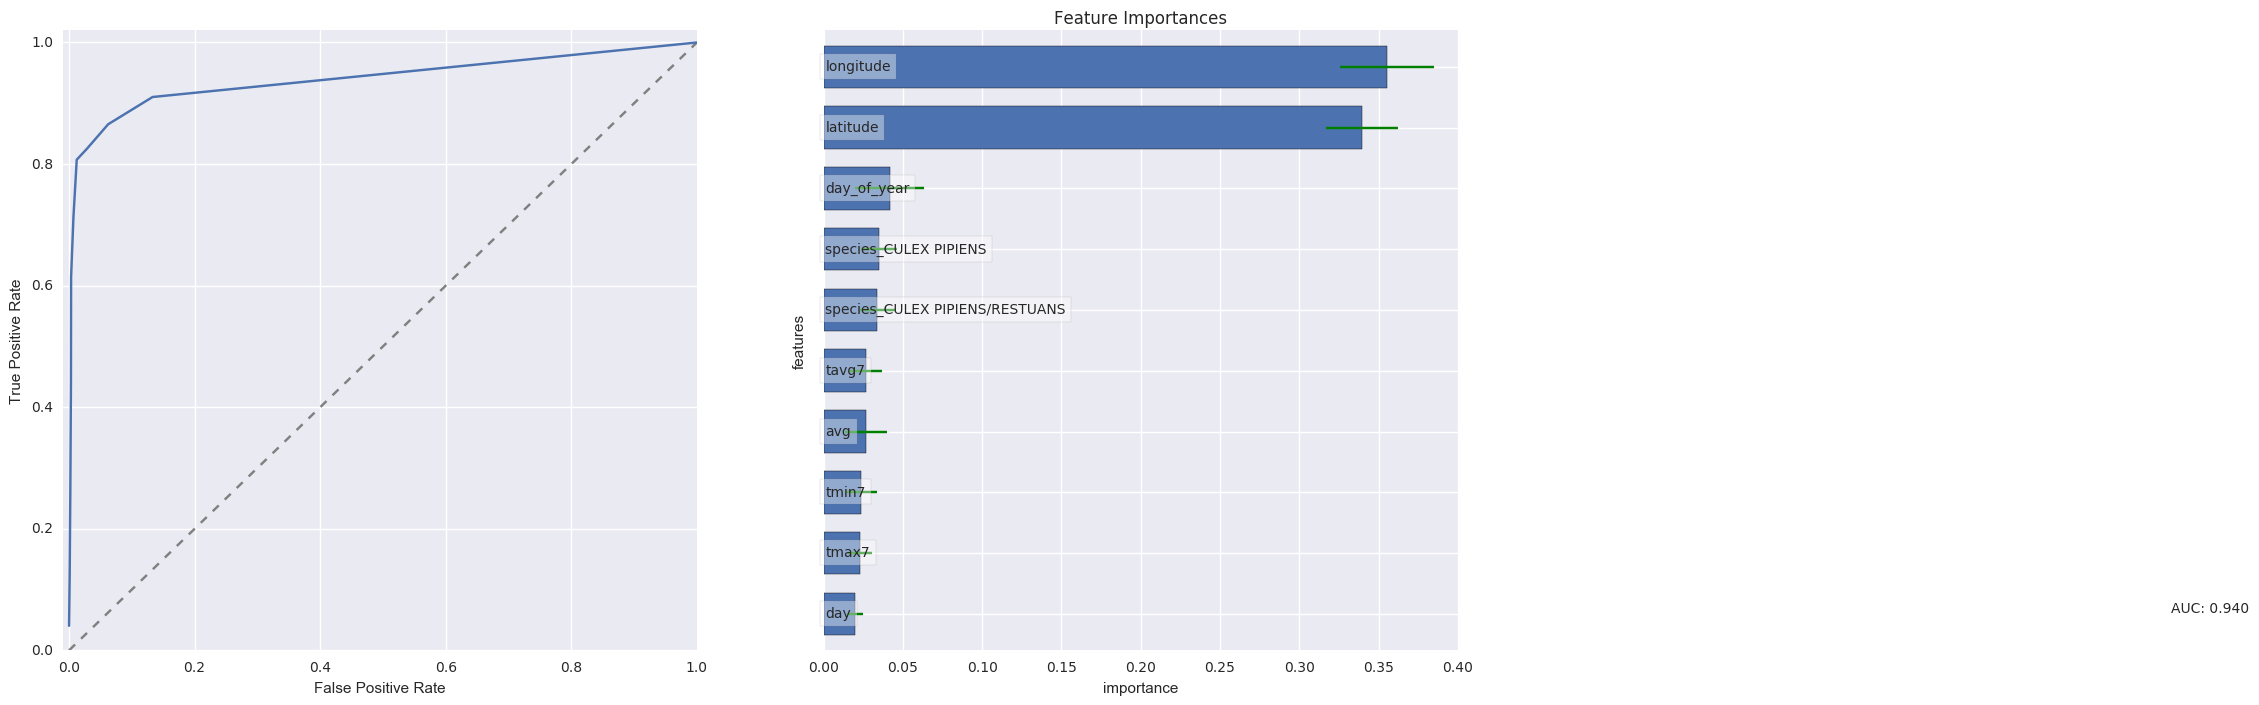

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

fig, (ax,ax1) = plt.subplots(1,2, figsize = (18,8))
pred = cl.predict_proba(X_test)[:,1]
plot_roc(y_test,pred, ax=ax)
df_imp = plot_importances(cl,X.columns, error_bars=True, ax = ax1, n_features=10)

In [39]:
column_names = X_train.columns
df_imp = pd.DataFrame({'features': column_names,
                       'importances': cl.feature_importances_})
df_imp.sort_values('importances', ascending=False)

,features,importances
5,longitude,0.355253
4,latitude,0.339512
3,day_of_year,0.041651
7,species_CULEX PIPIENS,0.034932
8,species_CULEX PIPIENS/RESTUANS,0.033833
16,tavg7,0.026837
13,avg,0.026665
15,tmin7,0.023507
17,tmax7,0.022664
2,day,0.019579
